### Donut
Now lets generate a donut and align the neurons in a topology of a circle.

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [23]:
def create_donut(sample_num):
    data = {}
    for i in range(sample_num):
        x, y = np.random.uniform(-2, 2, size=2)
        while x**2 + y**2 < 2 or x**2 + y**2 > 4:
            x, y = np.random.uniform(-2, 2, size=2)
        data.update({i: (x, y)})
    return data

Now lets update the "weight update" algorithm to work with a topology of a cirlce:

In [24]:
def update_weights_circle(N, c, X, alpha, sigma, radius):
    for j in N.keys():
        if abs(c - j) <= radius:
            distance = (c - j)**2
        elif len(N) - j <= radius - c:
            distance = (c - (j - len(N)))**2
        elif len(N) - c <= radius - j:
            distance = ((c - len(N)) - j)**2
        else:
            continue
        h = math.exp(-distance/(2*(sigma**2)))
        for i in range(len(X)):
            N[j][i] = N[j][i] + alpha * h * (X[i] - N[j][i])
    return N

Let's update the rest of the code to match this topology:

In [25]:
def create_neurons_circle(neurons_num):
    neurons = {}
    for i in range(neurons_num):
        neurons.update({i: [0, 0]})
    
    return neurons

# Stays the same
def decide_winner(p, N):
    min_dist = float("inf")
    winner_index = 0
    for n in N.keys():
        dist = 0
        for i in range(len(p)):
            dist += (p[i] - N[n][i])**2
        dist = math.sqrt(dist)
        if dist < min_dist:
            winner_index = n
            min_dist = dist
    return winner_index

def display_circle(P, N, t):
    px, py = [], []
    for i in P.keys():
        px.append(P[i][0])
        py.append(P[i][1])

    nx, ny = [], []
    for i in N.keys():
        nx.append(N[i][0])
        ny.append(N[i][1])
    nx.append(nx[0])
    ny.append(ny[0])

    plt.plot(px, py, 'ro')
    plt.plot(nx, ny, 'bo-')
    plt.title("epoch = " + str(t))
    plt.show()

def train_circle(P, N, epoches, learning_rate, neighborhood_size, neighborhood_radius):
    for t in range(epoches):
        if t % 50 == 0:
            display_circle(P, N, t)
        for p in range(len(P)):
            alpha = learning_rate * (1-(t/epoches))
            sigma = neighborhood_size * (1-(t/epoches))
            radius = round(neighborhood_radius * (1-(t/epoches)))
            c = decide_winner(P[p], N)
            N = update_weights_circle(N, c, P[p], alpha, sigma, radius)

    display_circle(P, N, epoches)


First, let's use the same initial parameters we used previously for the line topology:

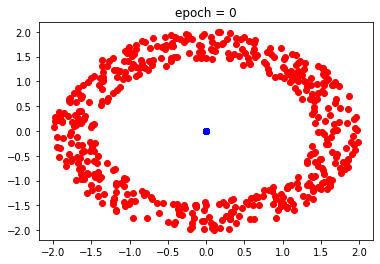

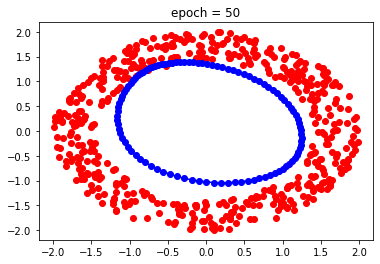

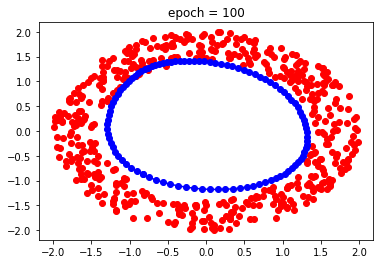

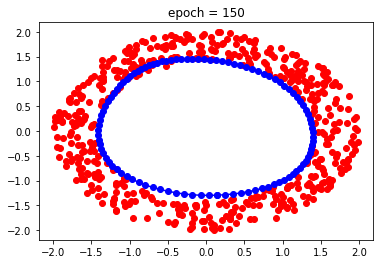

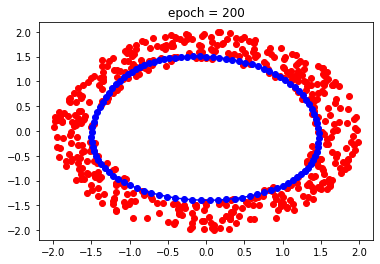

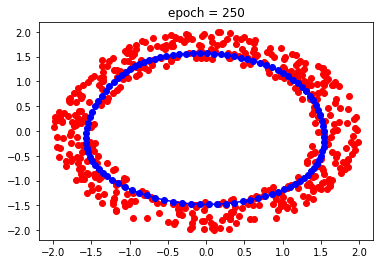

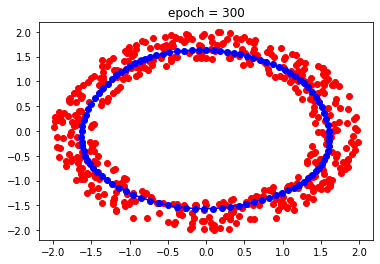

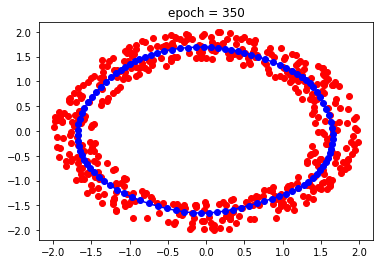

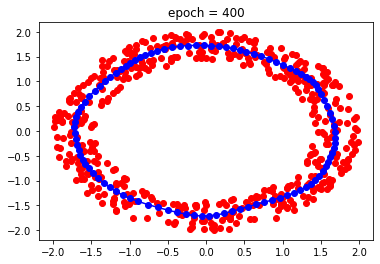

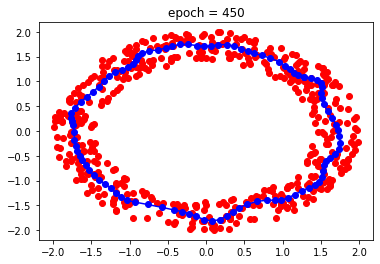

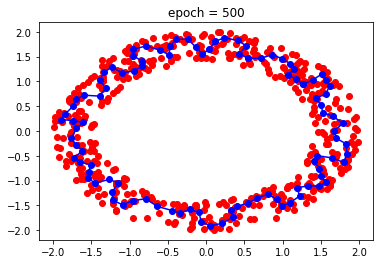

In [26]:
P = create_donut(500)
N = create_neurons_circle(30)

epoches = 300
learning_rate = 0.2
neighborhood_size = 15
neighborhood_radius = len(N)/2

train_circle(P, N, epoches, learning_rate, neighborhood_size, neighborhood_radius)

At about the 200th iteration it already got the shape of the donut. Let's use less iteration and decrease the neighborhood size (sigma):

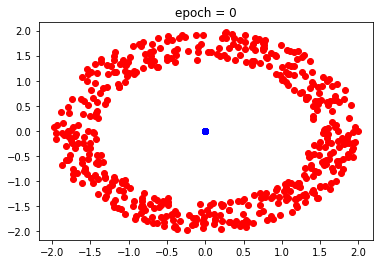

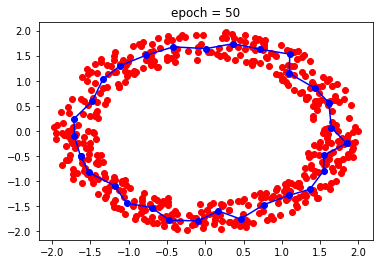

In [27]:
P = create_donut(500)
N = create_neurons_circle(30)

epoches = 50
learning_rate = 0.2
neighborhood_size = 2
neighborhood_radius = len(N)/2

train_circle(P, N, epoches, learning_rate, neighborhood_size, neighborhood_radius)

The circle at the end is not perfect, but it is much closer to the desired result. Let's decrease the learning rate (alpha):

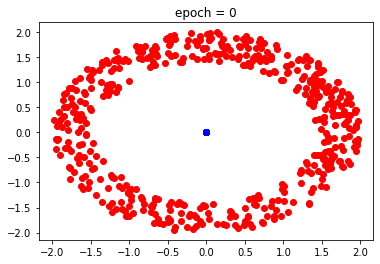

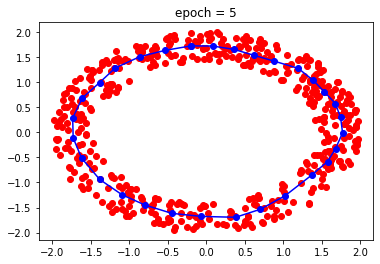

In [28]:
P = create_donut(500)
N = create_neurons_circle(30)

epoches = 5
learning_rate = 0.1
neighborhood_size = 2
neighborhood_radius = len(N)/2

train_circle(P, N, epoches, learning_rate, neighborhood_size, neighborhood_radius)

The neurons formed a circle in only 5 iterations!